In [1]:
#导入类库
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import DataFrame,Series
from pandas import read_csv
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
#导入数据
data_train = pd.read_csv('titanic_train.csv')
data_test = pd.read_csv('titanic_test.csv')

In [3]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
'''PassengerId	乘客编号
Survived	存活情况（存活：1 ; 死亡：0）
Pclass	客舱等级
Name	乘客姓名
Sex	性别
Age	年龄
SibSp	同乘的兄弟姐妹/配偶数
Parch	同乘的父母/小孩数
Ticket	船票编号
Fare	船票价格
Cabin	客舱号
Embarked	登船港口'''

'PassengerId\t乘客编号\nSurvived\t存活情况（存活：1 ; 死亡：0）\nPclass\t客舱等级\nName\t乘客姓名\nSex\t性别\nAge\t年龄\nSibSp\t同乘的兄弟姐妹/配偶数\nParch\t同乘的父母/小孩数\nTicket\t船票编号\nFare\t船票价格\nCabin\t客舱号\nEmbarked\t登船港口'

In [5]:
data_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
#查看数据类型
set_option('display.max_rows', 500)
print(data_train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
set_option('precision', 3)
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [9]:
#数据维度
print(data_train.shape)

(891, 12)


In [10]:
#数据分类分布
print(data_train.groupby(['Sex']).size())

Sex
female    314
male      577
dtype: int64


In [11]:
#空数据处理——Age中空数据用Age的中位数填充
data_train["Age"] = data_train['Age'].fillna(data_train['Age'].median())  
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,891.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.362,0.523,0.382,32.204
std,257.354,0.487,0.836,13.020,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,22.000,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,35.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


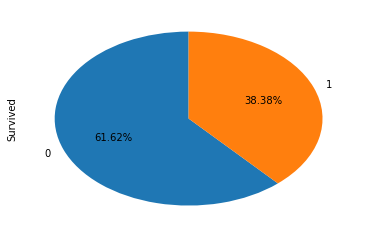

In [12]:
#圆饼图
data_train['Survived'].value_counts().plot.pie(labeldistance = 1.1,autopct = '%1.2f%%',
                                               shadow = False,startangle = 90,pctdistance = 0.6)
#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

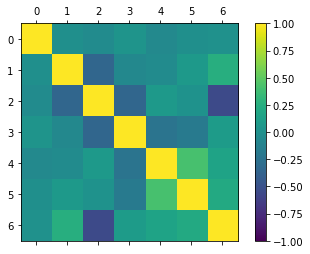

In [13]:
#关系矩阵图
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data_train.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [14]:
#选取简单的可用输入特征
from sklearn.linear_model import LinearRegression
predictors = ["Pclass","Age","SibSp","Parch","Fare"]     
 
#初始化现行回归算法
alg = LinearRegression()
#样本平均分成3份，3折交叉验证
#kf = KFold(data_train.shape[0],n_folds=3,random_state=1)   
kf = KFold(n_splits=3,shuffle=False,random_state=1) 
 
predictions = []
for train,test in kf.split(data_train):
    train_predictors = (data_train[predictors].iloc[train,:])
    train_target = data_train["Survived"].iloc[train]
    alg.fit(train_predictors,train_target)
    test_predictions = alg.predict(data_train[predictors].iloc[test,:])
    predictions.append(test_predictions)

In [15]:
predictions = np.concatenate(predictions,axis=0)


predictions[predictions>.5] = 1
predictions[predictions<=.5] = 0
accuracy = sum(predictions == data_train["Survived"]) / len(predictions)
print ("准确率为: ", accuracy)

准确率为:  0.703703703704


In [16]:
#逻辑回归算法
#初始化逻辑回归算法
from sklearn import model_selection
LogRegAlg=LogisticRegression(random_state=1)
re = LogRegAlg.fit(data_train[predictors],data_train["Survived"])
 
#使用sklearn库里面的交叉验证函数获取预测准确率分数
scores = model_selection.cross_val_score(LogRegAlg,data_train[predictors],data_train["Survived"],cv=3)
 
#使用交叉验证分数的平均值作为最终的准确率
print("准确率为: ",scores.mean())

准确率为:  0.699214365881


In [17]:
#Sex性别列处理：male用0，female用1
data_train.loc[data_train["Sex"] == "male","Sex"] = 0
data_train.loc[data_train["Sex"] == "female","Sex"] = 1

In [18]:
#缺失值用最多的S进行填充
data_train["Embarked"] = data_train["Embarked"].fillna('S') 
#地点用0,1,2
data_train.loc[data_train["Embarked"] == "S","Embarked"] = 0    
data_train.loc[data_train["Embarked"] == "C","Embarked"] = 1
data_train.loc[data_train["Embarked"] == "Q","Embarked"] = 2

In [19]:
predictors = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]  
 
LogRegAlg=LogisticRegression(random_state=1)
re = LogRegAlg.fit(data_train[predictors],data_train["Survived"])
scores = model_selection.cross_val_score(LogRegAlg,data_train[predictors],data_train["Survived"],cv=3)
print("准确率为: ",scores.mean())

准确率为:  0.787878787879


In [20]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.000,332.000,418.000,418.000,417.000
mean,1100.50,2.266,30.273,0.447,0.392,35.627
std,120.81,0.842,14.181,0.897,0.981,55.908
min,892.00,1.000,0.170,0.000,0.000,0.000
25%,996.25,1.000,21.000,0.000,0.000,7.896
50%,1100.50,3.000,27.000,0.000,0.000,14.454
75%,1204.75,3.000,39.000,1.000,0.000,31.500
max,1309.00,3.000,76.000,8.000,9.000,512.329


In [21]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.287,NaN,S


In [22]:
#新增：对测试集数据进行预处理，并进行结果预测
#Age列中的缺失值用Age均值进行填充
data_test["Age"] = data_test["Age"].fillna(data_test["Age"].median())
#Fare列中的缺失值用Fare最大值进行填充
data_test["Fare"] = data_test["Fare"].fillna(data_test["Fare"].max()) 
 
#Sex性别列处理：male用0，female用1
data_test.loc[data_test["Sex"] == "male","Sex"] = 0
data_test.loc[data_test["Sex"] == "female","Sex"] = 1
#缺失值用最多的S进行填充
data_test["Embarked"] = data_test["Embarked"].fillna('S') 
#地点用0,1,2
data_test.loc[data_test["Embarked"] == "S","Embarked"] = 0    
data_test.loc[data_test["Embarked"] == "C","Embarked"] = 1
data_test.loc[data_test["Embarked"] == "Q","Embarked"] = 2
 
test_features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"] 
#构造测试集的Survived列，
data_test["Survived"] = -1
 
test_predictors = data_test[test_features]
data_test["Survived"] = LogRegAlg.predict(test_predictors)

In [23]:
data_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.829,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.000,NaN,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.688,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.662,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.287,NaN,0,1
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.225,NaN,0,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.629,NaN,2,1
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.000,NaN,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.229,NaN,1,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.150,NaN,0,0


In [24]:
#30棵决策树，停止的条件：样本个数为2，叶子节点个数为1
alg=RandomForestClassifier(random_state=1,n_estimators=30,min_samples_split=2,min_samples_leaf=1) 
kf=model_selection.KFold(n_splits=10,shuffle=False,random_state=1)
scores=model_selection.cross_val_score(alg,data_train[predictors],data_train["Survived"],cv=kf)
print(scores)
print(scores.mean())

[ 0.74444444  0.80898876  0.78651685  0.82022472  0.85393258  0.85393258
  0.7752809   0.7752809   0.84269663  0.85393258]
0.81152309613


In [ ]:
from numpy import read_csv
from sklearn.feature_selection import SelecyKBest
from sklearn.fearure_selection import chi2
